In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
btc_hour = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/dane_btc.csv')

In [40]:
btc_hour.columns  = ["date", 'open', 'high', 'low', 'close', 'Volume BTC']

In [41]:
btc_hour

,date,open,high,low,close,Volume BTC
0,2019-05-22 23:00:00+00:00,7718.68,7729.63,7617.00,7620.00,140.468313
1,2019-05-22 22:00:00+00:00,7672.79,7743.93,7504.00,7718.68,443.406441
2,2019-05-22 21:00:00+00:00,7840.01,7840.01,7629.66,7672.79,103.295089
3,2019-05-22 20:00:00+00:00,7936.15,7943.23,7684.00,7840.01,515.316911
4,2019-05-22 19:00:00+00:00,7929.14,7936.15,7885.55,7936.15,26.902564
...,...,...,...,...,...,...
23322,2016-09-23 05:00:00+00:00,595.14,595.14,595.14,595.14,1.064241
23323,2016-09-23 04:00:00+00:00,595.14,595.14,595.13,595.14,53.161886
23324,2016-09-23 03:00:00+00:00,595.14,595.14,595.14,595.14,1.072499
23325,2016-09-23 02:00:00+00:00,595.13,595.14,595.13,595.14,2.068404


In [42]:
btc_hour = btc_hour.sort_values('date').reset_index().drop(columns = 'index')

In [43]:
btc_hour

,date,open,high,low,close,Volume BTC
0,2016-09-23 01:00:00+00:00,594.90,595.14,594.90,595.13,5.114822
1,2016-09-23 02:00:00+00:00,595.13,595.14,595.13,595.14,2.068404
2,2016-09-23 03:00:00+00:00,595.14,595.14,595.14,595.14,1.072499
3,2016-09-23 04:00:00+00:00,595.14,595.14,595.13,595.14,53.161886
4,2016-09-23 05:00:00+00:00,595.14,595.14,595.14,595.14,1.064241
...,...,...,...,...,...,...
23322,2019-05-22 19:00:00+00:00,7929.14,7936.15,7885.55,7936.15,26.902564
23323,2019-05-22 20:00:00+00:00,7936.15,7943.23,7684.00,7840.01,515.316911
23324,2019-05-22 21:00:00+00:00,7840.01,7840.01,7629.66,7672.79,103.295089
23325,2019-05-22 22:00:00+00:00,7672.79,7743.93,7504.00,7718.68,443.406441


EXP MOVING AVERAGE

In [44]:
ts = btc_hour['open']

In [45]:
ts.iloc[1:10]

1    595.13
2    595.14
3    595.14
4    595.14
5    595.14
6    595.14
7    595.42
8    595.50
9    595.50
Name: open, dtype: float64

In [46]:
n = 3
lag = 0
t=5

In [47]:
ts.loc[(t-(n+1)-lag):(t-lag-1)]

1    595.13
2    595.14
3    595.14
4    595.14
Name: open, dtype: float64

In [48]:
def ema(t, n, ts, lag):
    '''
    n - value of lag n
    t - index of ema (ema(n)_{t})
    ts - time series of price, increasing ordered
    lag - actually calculate ema(n)_{t-lag} for observation ts_{t}
    '''
    alfa = 2/(n+1)
    weights = [(1-alfa)**i for i in range(n+1)]
    suma = sum(weights)
    weights = [i/suma for i in weights]
    return sum(ts.loc[(t-(n+1)-lag):(t-lag-1)]*weights)
    

In [49]:
def ema_vec(t_vec, n, ts, lag):
    
    def ema_ust(t):
        return ema(t, n, ts, lag)
    
    ema_v = np.vectorize(ema_ust)
    
    
    return pd.Series(ema_v(t_vec), index = t_vec)
    

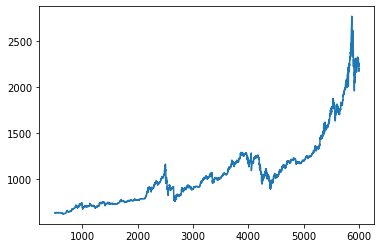

In [50]:
plt.plot(btc_hour['open'].iloc[500:6000])

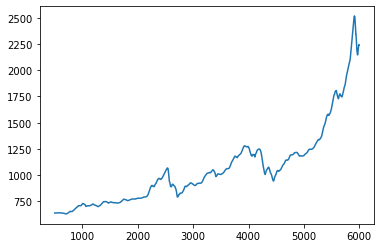

In [51]:
plt.plot(ema_vec(list(range(500,6000)), n=60, ts=btc_hour['open'], lag=0))

SIMPLE MOVING AVERAGE

In [52]:
def sma(t, n, ts, lag):
    '''
    n - value of lag n
    t - index of ema (ema(n)_{t})
    ts - time series of price, increasing ordered
    lag - actually calculate ema(n)_{t-lag} for observation ts_{t}
    '''
    weights = [1/n]*n
    return sum(ts.loc[(t-(n)-lag):(t-lag-1)]*weights)
    

In [53]:
def sma_vec(t_vec, n, ts, lag):
    
    def sma_ust(t):
        return sma(t, n, ts, lag)
    
    sma_v = np.vectorize(sma_ust)
    
    return pd.Series(sma_v(t_vec), index = t_vec)
    

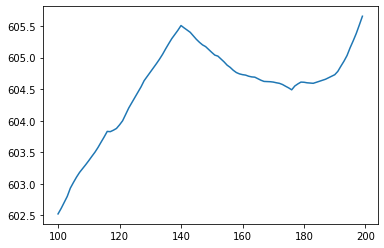

In [54]:
plt.plot(sma_vec(list(range(100,200)), n=60, ts=btc_hour['open'], lag=0))

SIMPLE MOVING AVERAGE PRICE SUBTRACTION

In [55]:
def smaps(t, n, ts, lag):
    return sma(t, n, ts, lag) - ts.loc[t-lag]

In [56]:
smaps(40, 10,ts=btc_hour['open'], lag=3)

-0.5539999999999736

In [57]:
def smaps_vec(t_vec, n, ts, lag):
    return pd.Series((np.asarray(sma_vec(t_vec, n, ts, lag)) - np.asarray(ts.loc[[i-lag for i in t_vec]])),index = t_vec)

In [58]:
smaps_vec(list(range(500,6000)), n=60, ts=btc_hour['open'], lag=3)

500     -0.756833
501     -0.389167
502      0.148500
503      0.889167
504      1.308333
          ...    
5995   -11.052000
5996    -3.131500
5997    13.079000
5998    14.680500
5999    -8.855833
Length: 5500, dtype: float64

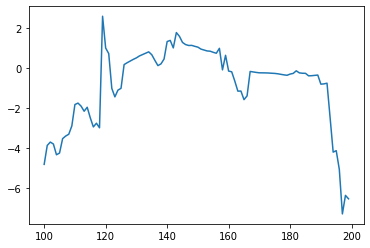

In [59]:
plt.plot(smaps_vec(list(range(100,200)), n=60, ts=btc_hour['open'], lag=3))
plt.show()

SIMPLE MOVING AVERAGE SUBTRACTION (GOLDEN AND DEATH CROSS)

In [60]:
def smas(t, n, m, ts, lag):
    if n<m:
        raise Exception("n should be greater than m")
    else:
        return sma(t, n, ts, lag) - sma(t, m, ts, lag)

def smas_vec(t_vec, n, m, ts, lag):
    if n<m:
        raise Exception("n should be greater than m")
    else: 
        return sma_vec(t_vec, n, ts, lag) - sma_vec(t_vec, m, ts, lag)

In [61]:
smas_vec(list(range(500,6000)), n=60,m=20, ts=btc_hour['open'], lag=3)

500     -0.199833
501     -0.182167
502     -0.173000
503     -0.137833
504     -0.108167
          ...    
5995   -33.553000
5996   -29.893500
5997   -25.328000
5998   -22.991000
5999   -21.718833
Length: 5500, dtype: float64

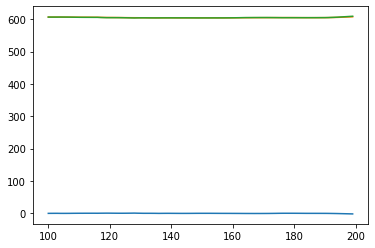

In [62]:
plt.plot(smas_vec(list(range(100,200)), n=20,m=12, ts=btc_hour['open'], lag=0))
plt.plot(sma_vec(list(range(100,200)), n=20, ts=btc_hour['open'], lag=0))
plt.plot(sma_vec(list(range(100,200)), n=12, ts=btc_hour['open'], lag=0))

MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD)

In [63]:
def macd(t, ts, lag):
   
    return ema(t, 26, ts, lag) - ema(t, 12, ts, lag)

def macd_vec(t_vec, ts, lag):
   
    mac = ema_vec(t_vec, 26, ts, lag) - ema_vec(t_vec, 12, ts, lag)
    mac_df = pd.DataFrame(columns = ['macd'], index = t_vec)
    mac_df['macd'] = mac
    return mac_df['macd']

def macdss_vec(t_vec, ts, lag):
    
    mac = macd_vec(list(range(min(t_vec)-10-lag, (max(t_vec)+1))), ts,lag)
    sl = ema_vec(t_vec, 9, mac ,0)
    return mac.loc[t_vec]-sl.loc[t_vec]

RSI

In [64]:
lag = 0
ts_c = btc_hour['close']
ts_o = btc_hour['open']
n=10
t=20

In [65]:
def rsi(t, n, ts_c, ts_o, lag):
    
    g = sum(((ts_c.loc[(t-n+1-lag):(t-lag)] / ts_o.loc[(t-n+1-lag):(t-lag)])-1)*(ts_o.loc[(t-n+1-lag):(t-lag)] < ts_c.loc[(t-n+1-lag):(t-lag)]))
    l = sum((1-(ts_c.loc[(t-n+1-lag):(t-lag)] / ts_o.loc[(t-n+1-lag):(t-lag)]))*(ts_o.loc[(t-n+1-lag):(t-lag)] > ts_c.loc[(t-n+1-lag):(t-lag)]))
    if l!=0:
        rs = g/l
    else:
        return 100
    if rs!= -1:
        return 100-(100/(1+rs))
    else: 
        return 0

In [66]:
def rsi_vec(t_vec, n, ts_c, ts_o, lag):
    
    def rsi_ust(t):
        return rsi(t, n, ts_c, ts_o, lag)
    
    rsi_v = np.vectorize(rsi_ust)
    
    return pd.Series(rsi_v(t_vec), index = t_vec)

In [67]:
rsi(5000, n, ts_c, ts_o, 20)

65.30306709644017

In [68]:
rsi_vec(list(range(30,52)), n, ts_c, ts_o, lag)

30    93.884447
31    67.393641
32    68.174929
33    65.663613
34    73.018736
35    67.449581
36    71.218627
37    26.359537
38    27.050696
39    27.050696
40    27.113294
41    33.368003
42    18.266599
43    42.087824
44    40.849511
45    42.229778
46    38.284532
47    52.999622
48    51.467655
49    52.605281
50    52.605281
51    52.517371
dtype: float64

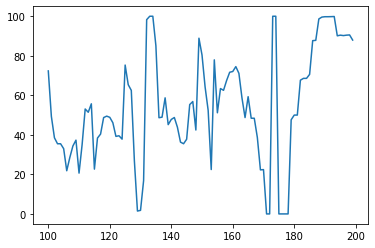

In [69]:
plt.plot(rsi_vec(list(range(100,200)), n, ts_c, ts_o, lag))


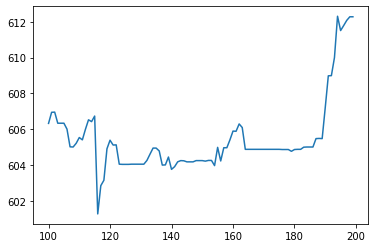

In [70]:
ts = btc_hour['open']
plt.plot(ts.loc[list(range(100,200))])

STOCHASTIC OSCILLATOR

In [71]:
n = 5
ts_c = btc_hour['close']
ts_h = btc_hour['high']
ts_l = btc_hour['low']

In [72]:
def k_perc(t, n, ts_c, ts_l, ts_h, lag):
    if (max(ts_h.loc[t-n-lag:t-lag])-min(ts_l.loc[t-n-lag:t-lag]))!=0:
        return (ts_c.loc[t-lag]-min(ts_l.loc[t-n-lag:t-lag]))/(max(ts_h.loc[t-n-lag:t-lag])-min(ts_l.loc[t-n-lag:t-lag]))*100
    else:
        return 100
    

In [73]:
k_perc(20, n, ts_c, ts_l, ts_h, 10)

98.09885931559108

In [74]:
def k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def k_perc_ust(t):
        return k_perc(t, n, ts_c, ts_l, ts_h, lag)
    
    k_perc_v = np.vectorize(k_perc_ust)
    
    return pd.Series(k_perc_v(t_vec), index = t_vec)

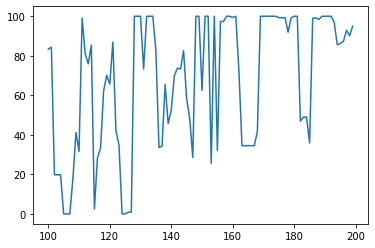

In [75]:
plt.plot(k_perc_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

In [76]:
t_vec = list(range(40,200))

In [77]:
def d_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    k = k_perc_vec(list(range(min(t_vec)-lag-4,max(t_vec))), n, ts_c, ts_l, ts_h, lag)
    return sma_vec(t_vec, 3, k ,0)

In [78]:
def k_perc_d_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    return (k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag) - d_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag)).loc[t_vec]

ROC

In [79]:
def roc(t, n, ts_c, lag):
    return (ts_c.loc[t-lag]-ts_c.loc[t-n-lag])/ts_c.loc[t-n-lag]*100

In [80]:
roc(590, n, ts_c, lag)

0.2830055186076236

In [81]:
def roc_vec(t_vec, n, ts_c, lag):
    
    def roc_ust(t):
        return roc(t, n, ts_c, lag)
    
    roc_v = np.vectorize(roc_ust)
    
    return(pd.Series(roc_v(t_vec), index = t_vec))

In [82]:
roc_vec(t_vec, n, ts_c, lag)

40    -0.273709
41    -0.348097
42    -0.412652
43    -0.033268
44     0.013307
         ...   
195    0.461427
196    0.507397
197    0.373770
198   -0.004899
199    0.124283
Length: 160, dtype: float64

MFI - money flow index

In [83]:
def mfi(t, n, ts_c, ts_l, ts_h, ts_v, lag):
    tp = pd.Series([(ts_h.loc[t-i-lag]+ts_l.loc[t-i-lag]+ts_c.loc[t-i-lag])/3 for i in list(range(n+1))[::-1]], index = list(range(t-n,t+1)))
    rmf = tp*ts_v[t-lag-n:t-lag+1]
    ip_t = pd.Series(np.array(rmf.loc[t-lag-n+1:t-lag])>np.array(rmf.loc[t-lag-n:t-lag-1]), index = list(range(t-lag-n+1,t-lag+1)))
    in_t = pd.Series(np.array(rmf.loc[t-lag-n+1:t-lag])<np.array(rmf.loc[t-lag-n:t-lag-1]), index = list(range(t-lag-n+1,t-lag+1)))
    if sum(rmf[1:]*in_t)!=0:
      mfr = sum(rmf[1:]*ip_t)/sum(rmf[1:]*in_t)
    else:
      mfr = 100000000
    return 100 - 100/(1+mfr)

In [84]:
ts_v = btc_hour['Volume BTC']
mfi(5600, n, ts_c, ts_l, ts_h, ts_v, lag)

42.29383304582897

In [85]:
def mfi_vec(t_vec, n, ts_c, ts_l, ts_h, ts_v, lag):
    
    def mfi_ust(t):
        return mfi(t, n, ts_c, ts_l, ts_h, ts_v, lag)
    
    mfi_v = np.vectorize(mfi_ust)
    
    return pd.Series(mfi_v(t_vec), index = t_vec)

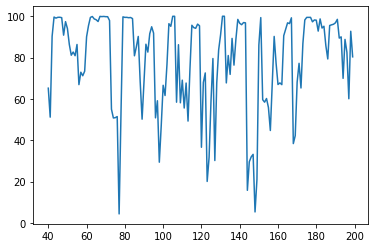

In [86]:
plt.plot(mfi_vec(t_vec, n, ts_c, ts_l, ts_h, ts_v, lag))

CCI - commodity channel index

In [87]:
def cci(t, n, ts_c, ts_l, ts_h, lag):
    tp = pd.Series([(ts_h.loc[t-i-lag]+ts_l.loc[t-i-lag]+ts_c.loc[t-i-lag])/3 for i in list(range(n))[::-1]], index = list(range(t-n+1,t+1)))
    stp = 1/n*sum(tp)
    return (tp.loc[t]-stp)/(0.015*1/n*sum(abs(tp-stp)))

In [88]:
cci(t, n, ts_c, ts_l, ts_h, lag)

118.72759856629106

In [89]:
def cci_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def cci_ust(t):
        return cci(t, n, ts_c, ts_l, ts_h, lag)
    
    cci_v = np.vectorize(cci_ust)
    
    return cci_v(t_vec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


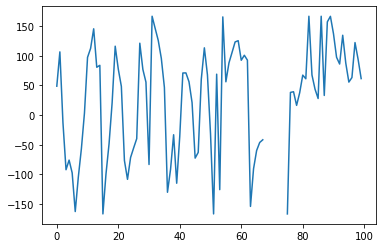

In [90]:
plt.plot(cci_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

LWI - Larry Williams %R

In [91]:
def lwi(t, n, ts_c, ts_l, ts_h, lag):
    if (max(ts_h.loc[t-n-lag+1:t-lag])-min(ts_l.loc[t-n-lag+1:t-lag])) == 0:
        return (max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag]>0)*100 - (max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag]<0)*100
    else:
        return -(max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag])/(max(ts_h.loc[t-n-lag+1:t-lag])-min(ts_l.loc[t-n-lag+1:t-lag]))*100

In [92]:
lwi(t, n, ts_c, ts_l, ts_h, lag)

-0.0

In [93]:
def lwi_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def lwi_ust(t):
        return lwi(t, n, ts_c, ts_l, ts_h, lag)
    
    lwi_v = np.vectorize(lwi_ust)
    
    return lwi_v(t_vec)

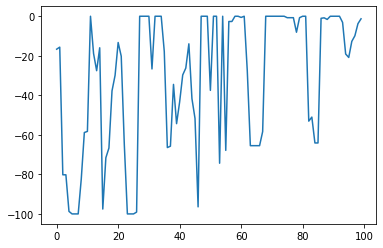

In [94]:
plt.plot(lwi_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

PRZYGOTOWANIE DANYCH

zakres danych: 2017-08-30 to 2019-03-29

In [ ]:
btc_hour.loc[(btc_hour['date']>'2016-11-23') & (btc_hour['date']<'2019-05-24')]


,date,open,high,low,close,Volume BTC
1463,2016-11-23 00:00:00+00:00,748.35,748.35,748.34,748.35,9.899392
1464,2016-11-23 01:00:00+00:00,748.35,748.35,748.34,748.35,14.198202
1465,2016-11-23 02:00:00+00:00,748.35,748.35,748.34,748.35,29.691222
1466,2016-11-23 03:00:00+00:00,748.35,748.35,748.34,748.35,2.767514
1467,2016-11-23 04:00:00+00:00,748.35,748.35,746.66,746.66,24.658577
...,...,...,...,...,...,...
23322,2019-05-22 19:00:00+00:00,7929.14,7936.15,7885.55,7936.15,26.902564
23323,2019-05-22 20:00:00+00:00,7936.15,7943.23,7684.00,7840.01,515.316911
23324,2019-05-22 21:00:00+00:00,7840.01,7840.01,7629.66,7672.79,103.295089
23325,2019-05-22 22:00:00+00:00,7672.79,7743.93,7504.00,7718.68,443.406441


In [ ]:
t_vec = list(range(1463,23326))
ts = btc_hour['open']
ts_c = btc_hour['close']
ts_h = btc_hour['high']
ts_o = btc_hour['open']
ts_l = btc_hour['low']
ts_v = btc_hour['Volume BTC']
lag = 0
n=12


In [95]:
t_vec = list(range(23320,23327))
ts = btc_hour['open']
ts_c = btc_hour['close']
ts_h = btc_hour['high']
ts_o = btc_hour['open']
ts_l = btc_hour['low']
ts_v = btc_hour['Volume BTC']
lag = 0
n=12


In [100]:
df = btc_hour.loc[t_vec,:]

In [101]:
df

,date,open,high,low,close,Volume BTC
23320,2019-05-22 17:00:00+00:00,7951.72,7972.91,7860.78,7907.76,79.156005
23321,2019-05-22 18:00:00+00:00,7907.76,7941.87,7860.69,7929.14,46.059919
23322,2019-05-22 19:00:00+00:00,7929.14,7936.15,7885.55,7936.15,26.902564
23323,2019-05-22 20:00:00+00:00,7936.15,7943.23,7684.00,7840.01,515.316911
23324,2019-05-22 21:00:00+00:00,7840.01,7840.01,7629.66,7672.79,103.295089
23325,2019-05-22 22:00:00+00:00,7672.79,7743.93,7504.00,7718.68,443.406441
23326,2019-05-22 23:00:00+00:00,7718.68,7729.63,7617.00,7620.00,140.468313


In [102]:
%%time
for lag in [0]:
    #ema, sma
    for n in [12, 24, 30, 50, 100, 200]:
        df['ema_n'+str(n)+'_l'+str(lag)] = ema_vec(t_vec, n, ts, lag)
        df['sma_n'+str(n)+'_l'+str(lag)] = sma_vec(t_vec, n, ts, lag)
        df['smaps_n'+str(n)+'_l'+str(lag)] = smaps_vec(t_vec, n, ts, lag)

    df['smas_n200_m50_l'+str(lag)] = smas_vec(t_vec, 200, 50, ts, lag)
    df['macdss_l'+str(lag)] = macdss_vec(t_vec, ts, lag)

    for n in [14, 24, 36, 48]:
        df['rsi_n'+str(n)+'_l'+str(lag)] = rsi_vec(t_vec, n, ts_c, ts_o, lag)
        df['k_perc_n'+str(n)+'_l'+str(lag)] = k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['k_perc_d_n'+str(n)+'_l'+str(lag)] = k_perc_d_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['cci_n'+str(n)+'_l'+str(lag)] = cci_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['lwi_n'+str(n)+'_l'+str(lag)] = lwi_vec(t_vec, n, ts_c, ts_l, ts_h, lag)

    for n in [10, 12, 20, 48, 100]:
        df['roc_n'+str(n)+'_l'+str(lag)] = roc_vec(t_vec, n, ts_c, lag)
        
    df['volume_l'+str(lag)] = pd.Series(list(btc_hour['Volume BTC'].loc[[i-lag for i in t_vec]]), index = t_vec)





CPU times: user 246 ms, sys: 1.69 ms, total: 247 ms
Wall time: 245 ms


In [103]:
df

,date,open,high,low,close,Volume BTC,ema_n12_l0,sma_n12_l0,smaps_n12_l0,ema_n24_l0,sma_n24_l0,smaps_n24_l0,ema_n30_l0,sma_n30_l0,smaps_n30_l0,ema_n50_l0,sma_n50_l0,smaps_n50_l0,ema_n100_l0,sma_n100_l0,smaps_n100_l0,ema_n200_l0,sma_n200_l0,smaps_n200_l0,smas_n200_m50_l0,macdss_l0,rsi_n14_l0,k_perc_n14_l0,k_perc_d_n14_l0,cci_n14_l0,lwi_n14_l0,rsi_n24_l0,k_perc_n24_l0,k_perc_d_n24_l0,cci_n24_l0,lwi_n24_l0,rsi_n36_l0,k_perc_n36_l0,k_perc_d_n36_l0,cci_n36_l0,lwi_n36_l0,rsi_n48_l0,k_perc_n48_l0,k_perc_d_n48_l0,cci_n48_l0,lwi_n48_l0,roc_n10_l0,roc_n12_l0,roc_n20_l0,roc_n48_l0,roc_n100_l0,volume_l0
23320,2019-05-22 17:00:00+00:00,7951.72,7972.91,7860.78,7907.76,79.156005,7917.622149,7899.255833,-52.464167,7967.920481,7945.707083,-6.012917,7953.096677,7941.195000,-10.525000,7909.283505,7928.7642,-22.9558,7765.962686,7858.6337,-93.0863,7831.593675,7802.73920,-148.98080,-126.02500,78.869317,47.617465,51.886493,-12.052025,17.563446,-48.113507,44.340795,41.934564,-8.988219,-38.862625,-58.065436,50.151776,41.934564,-8.988219,-44.906021,-58.065436,53.654888,46.917022,-6.757887,-33.448199,-53.082978,-0.061926,-0.565091,-1.162266,1.799569,7.865941,79.156005
23321,2019-05-22 18:00:00+00:00,7907.76,7941.87,7860.69,7929.14,46.059919,7915.030106,7899.610833,-8.149167,7971.394798,7946.798333,39.038333,7949.899238,7941.634333,33.874333,7917.130030,7931.3264,23.5664,7777.050234,7865.0559,-42.7041,7826.100811,7802.50875,-105.25125,-128.81765,74.228818,48.434362,59.432464,-6.362428,12.994944,-40.567536,44.641579,48.033203,-5.142102,-38.227738,-51.966797,49.768325,48.033203,-5.142102,-48.683362,-51.966797,55.066222,51.502348,-3.866143,-47.308332,-53.557387,0.004793,-0.090218,-0.693343,2.535739,7.767729,46.059919
23322,2019-05-22 19:00:00+00:00,7929.14,7936.15,7885.55,7936.15,26.902564,7908.205165,7895.865833,-33.274167,7975.163578,7942.163333,13.023333,7950.375189,7942.347333,13.207333,7921.460374,7932.7028,3.5628,7788.344044,7870.8225,-58.3175,7824.235068,7801.70065,-127.43935,-131.00215,69.200103,48.610113,61.906611,2.332969,32.581805,-38.093389,46.058632,50.032804,1.885501,-21.210965,-49.967196,50.146976,50.032804,1.885501,-32.737894,-49.967196,53.367965,48.102885,-3.485251,-39.425988,-55.540910,0.564652,0.296866,-0.230562,1.575959,7.855529,26.902564
23323,2019-05-22 20:00:00+00:00,7936.15,7943.23,7684.00,7840.01,515.316911,7899.564118,7895.269167,-40.880833,7970.241926,7937.732500,1.582500,7955.216547,7943.680667,7.530667,7925.378649,7934.4006,-1.7494,7799.428970,7876.5377,-59.6123,7821.553236,7800.99750,-135.15250,-133.40310,69.410767,42.180296,43.326483,-14.415373,-111.935361,-56.673517,37.114260,36.508939,-10.157917,-155.974376,-63.491061,45.947353,36.508939,-10.157917,-171.879892,-63.491061,45.500353,33.104165,-15.736586,-188.159839,-66.895835,-0.721289,-1.119343,-2.297623,-2.198290,6.582117,515.316911
23324,2019-05-22 21:00:00+00:00,7840.01,7840.01,7629.66,7672.79,103.295089,7892.881358,7897.226667,57.216667,7963.342303,7934.483333,94.473333,7960.243109,7943.867333,103.857333,7929.250487,7937.7642,97.7542,7810.141798,7882.3179,42.3079,7818.850824,7800.50285,-39.50715,-137.26135,67.798235,33.976079,10.407316,-44.481203,-199.586312,-89.592684,34.248069,8.954449,-35.903866,-267.026232,-89.592684,39.795537,8.954449,-35.903866,-289.913203,-91.045551,40.468267,8.205704,-36.030762,-331.374436,-91.113446,-1.800983,-2.772572,-3.541881,-4.805748,5.223756,103.295089
23325,2019-05-22 22:00:00+00:00,7672.79,7743.93,7504.00,7718.68,443.406441,7887.585932,7889.830833,217.040833,7956.775563,7924.000000,251.210000,7961.386552,7939.755667,266.965667,7936.272710,7939.9034,267.1134,7820.762140,7887.1596,214.3696,7816.374345,7798.64610,125.85610,-141.25730,58.755464,36.626800,39.749667,1.202863,-194.358288,-60.250333,37.683029,39.749667,7.917603,-261.597848,-60.250333,43.039353,35.348745,3.516681,-309.186929,-64.651255,44.735584,35.135843,5.331592,-362.531617,-64.651255,-0.790470,-2.257701,-3.121235,-2.613238,6.149471,443.406441
23326,2019-05-22 23:00:00+00:00,7718

In [ ]:
%%time
for lag in [0]:
    #ema, sma
    for n in [12, 24, 30, 50, 100, 200]:
        df['ema_n'+str(n)] = ema_vec(t_vec, n, ts, lag)
        df['sma_n'+str(n)] = sma_vec(t_vec, n, ts, lag)
        df['smaps_n'+str(n)] = smaps_vec(t_vec, n, ts, lag)

    df['smas_n200_m50_l'] = smas_vec(t_vec, 200, 50, ts, lag)
    df['macdss_l'] = macdss_vec(t_vec, ts, lag)

    for n in [14, 24, 36, 48]:
        df['rsi_n'+str(n)] = rsi_vec(t_vec, n, ts_c, ts_o, lag)
        df['k_perc_n'+str(n)] = k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['k_perc_d_n'+str(n)] = k_perc_d_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['cci_n'+str(n)] = cci_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['lwi_n'+str(n)] = lwi_vec(t_vec, n, ts_c, ts_l, ts_h, lag)

    for n in [10, 12, 20, 48, 100]:
        df['roc_n'+str(n)] = roc_vec(t_vec, n, ts_c, lag)
        
    df['volume'] = pd.Series(list(btc_hour['Volume BTC'].loc[[i-lag for i in t_vec]]), index = t_vec)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


CPU times: user 7min 42s, sys: 5.58 s, total: 7min 48s
Wall time: 7min 40s


In [ ]:
df = df.fillna(0).drop(columns = ['high', 'low', 'close', 'Volume BTC'])

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
diff = ((df.open.iloc[1:].reset_index(drop = True) - df.open.iloc[0:df.shape[0]-1])>0).astype('int')
df = df.iloc[1:,:].reset_index(drop=True)
df['y'] = diff

In [ ]:
df = df[['date','y','open']+list(df.columns[2:df.shape[1]-1])]

In [ ]:
df.to_csv('/content/drive/My Drive/Magisterka/dane_final/df_transformed_lag0.csv', index=False)

In [ ]:
df

,date,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,ema_n30_l4,sma_n30_l4,smaps_n30_l4,ema_n50_l4,sma_n50_l4,smaps_n50_l4,ema_n100_l4,sma_n100_l4,smaps_n100_l4,ema_n200_l4,sma_n200_l4,smaps_n200_l4,smas_n200_m50_l4,macdss_l4,rsi_n14_l4,k_perc_n14_l4,k_perc_d_n14_l4,cci_n14_l4,lwi_n14_l4,rsi_n24_l4,k_perc_n24_l4,k_perc_d_n24_l4,cci_n24_l4,lwi_n24_l4,rsi_n36_l4,k_perc_n36_l4,k_perc_d_n36_l4,cci_n36_l4,lwi_n36_l4,rsi_n48_l4,k_perc_n48_l4,k_perc_d_n48_l4,cci_n48_l4,lwi_n48_l4,roc_n10_l4,roc_n12_l4,roc_n20_l4,roc_n48_l4,roc_n100_l4,volume_l4
0,2016-11-23 00:00:00+00:00,748.35,9.899392,739.792914,743.770000,-1.480000,737.673465,739.739583,-5.510417,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.29815,-1.770121,76.934536,81.707989,3.122130,48.274986,-18.672666,68.250986,81.707989,3.122130,83.100002,-18.292011,72.564192,83.844282,2.696899,123.823939,-16.155718,69.269475,87.337910,...,736.180848,737.714333,-12.145667,730.411341,733.6672,-16.1928,743.811249,740.7455,-9.1145,726.892556,733.39375,-16.46625,-0.27345,1.773570,93.289760,89.476584,-10.220018,97.402873,-10.523416,78.648056,89.476584,-10.220018,153.363110,-10.523416,80.311566,90.887405,-8.857091,215.692011,-9.294404,75.213631,93.496765,-6.370218,221.069205,-6.942930,1.904179,2.019267,1.665130,3.463693,0.396358,223.364139
1,2016-11-23 01:00:00+00:00,748.35,14.198202,740.826125,744.561667,-3.788333,737.779298,740.063333,-8.286667,737.827897,739.566333,-8.783667,732.514598,735.8544,-12.4956,743.490019,740.8293,-7.5207,728.250230,734.38375,-13.96625,-1.47065,-2.946631,76.573939,81.327334,5.331007,57.256781,-18.672666,69.239495,81.707989,5.711662,85.908828,-18.292011,72.564192,83.844282,5.044607,125.268934,-16.163583,68.884174,87.337910,...,736.716266,738.293667,-11.466333,730.595695,734.1880,-15.5720,743.686257,740.7443,-9.0157,727.172356,733.64045,-16.11955,-0.54755,0.772465,86.044794,81.652893,-14.535904,57.018655,-18.347107,73.395434,81.652893,-14.535904,98.491121,-18.347107,76.817695,83.795620,-12.911343,147.398688,-16.204380,72.824336,87.895311,-9.803928,166.998428,-12.632777,1.698739,1.762354,1.473958,3.175194,0.575222,2077.354623
2,2016-11-23 02:00:00+00:00,748.35,29.691222,742.043776,745.604167,-2.745833,737.939571,740.499167,-7.850833,738.056789,739.904000,-8.446000,732.979670,736.3152,-12.0348,743.493389,740.8854,-7.4646,728.639623,734.62150,-13.72850,-1.69370,-4.116302,76.484560,81.327334,5.439527,54.549424,-18.672666,69.263977,81.707989,5.693297,78.383271,-18.292011,71.552111,83.836417,5.020521,114.230915,-17.300677,68.884174,87.337910,...,737.181024,738.815000,-9.525000,731.030452,734.9318,-13.4082,743.558431,740.7739,-7.5661,727.516784,733.88710,-14.45290,-1.04470,-0.435208,74.138640,64.628099,-25.465222,42.156717,-35.371901,65.011200,64.628099,-25.465222,79.745724,-35.371901,70.173712,68.759124,-22.559963,122.018004,-31.240876,67.639430,75.644917,-18.027765,146.657546,-24.485126,1.401456,1.291199,1.358703,2.501857,0.169357,141.038228
3,2016-11-23 03:00:00+00:00,748.35,2.767514,743.464348,746.720833,-1.629167,738.073065,740.952083,-7.397917,738.146716,740.240333,-8.109667,733.433231,736.7410,-11.6090,743.525941,740.9567,-7.3933,728.993355,734.86345,-13.48655,-1.87755,-5.327944,79.483065,81.327334,-0.126885,52.314346,-19.773675,75.135143,81.707989,0.000000,72.282286,-18.292011,70.220029,82.699323,-1.142338,104.966816,-18.292011,67.505072,87.337910,...,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.2

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/df_transformed.csv')

In [ ]:
df

,date,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,ema_n30_l4,sma_n30_l4,smaps_n30_l4,ema_n50_l4,sma_n50_l4,smaps_n50_l4,ema_n100_l4,sma_n100_l4,smaps_n100_l4,ema_n200_l4,sma_n200_l4,smaps_n200_l4,smas_n200_m50_l4,macdss_l4,rsi_n14_l4,k_perc_n14_l4,k_perc_d_n14_l4,cci_n14_l4,lwi_n14_l4,rsi_n24_l4,k_perc_n24_l4,k_perc_d_n24_l4,cci_n24_l4,lwi_n24_l4,rsi_n36_l4,k_perc_n36_l4,k_perc_d_n36_l4,cci_n36_l4,lwi_n36_l4,rsi_n48_l4,k_perc_n48_l4,k_perc_d_n48_l4,cci_n48_l4,lwi_n48_l4,roc_n10_l4,roc_n12_l4,roc_n20_l4,roc_n48_l4,roc_n100_l4,volume_l4
0,2016-11-23 00:00:00+00:00,748.35,9.899392,739.792914,743.770000,-1.480000,737.673465,739.739583,-5.510417,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.29815,-1.770121,76.934536,81.707989,3.122130,48.274986,-18.672666,68.250986,81.707989,3.122130,83.100002,-18.292011,72.564192,83.844282,2.696899,123.823939,-16.155718,69.269475,87.337910,...,736.180848,737.714333,-12.145667,730.411341,733.6672,-16.1928,743.811249,740.7455,-9.1145,726.892556,733.39375,-16.46625,-0.27345,1.773570,93.289760,89.476584,-10.220018,97.402873,-10.523416,78.648056,89.476584,-10.220018,153.363110,-10.523416,80.311566,90.887405,-8.857091,215.692011,-9.294404,75.213631,93.496765,-6.370218,221.069205,-6.942930,1.904179,2.019267,1.665130,3.463693,0.396358,223.364139
1,2016-11-23 01:00:00+00:00,748.35,14.198202,740.826125,744.561667,-3.788333,737.779298,740.063333,-8.286667,737.827897,739.566333,-8.783667,732.514598,735.8544,-12.4956,743.490019,740.8293,-7.5207,728.250230,734.38375,-13.96625,-1.47065,-2.946631,76.573939,81.327334,5.331007,57.256781,-18.672666,69.239495,81.707989,5.711662,85.908828,-18.292011,72.564192,83.844282,5.044607,125.268934,-16.163583,68.884174,87.337910,...,736.716266,738.293667,-11.466333,730.595695,734.1880,-15.5720,743.686257,740.7443,-9.0157,727.172356,733.64045,-16.11955,-0.54755,0.772465,86.044794,81.652893,-14.535904,57.018655,-18.347107,73.395434,81.652893,-14.535904,98.491121,-18.347107,76.817695,83.795620,-12.911343,147.398688,-16.204380,72.824336,87.895311,-9.803928,166.998428,-12.632777,1.698739,1.762354,1.473958,3.175194,0.575222,2077.354623
2,2016-11-23 02:00:00+00:00,748.35,29.691222,742.043776,745.604167,-2.745833,737.939571,740.499167,-7.850833,738.056789,739.904000,-8.446000,732.979670,736.3152,-12.0348,743.493389,740.8854,-7.4646,728.639623,734.62150,-13.72850,-1.69370,-4.116302,76.484560,81.327334,5.439527,54.549424,-18.672666,69.263977,81.707989,5.693297,78.383271,-18.292011,71.552111,83.836417,5.020521,114.230915,-17.300677,68.884174,87.337910,...,737.181024,738.815000,-9.525000,731.030452,734.9318,-13.4082,743.558431,740.7739,-7.5661,727.516784,733.88710,-14.45290,-1.04470,-0.435208,74.138640,64.628099,-25.465222,42.156717,-35.371901,65.011200,64.628099,-25.465222,79.745724,-35.371901,70.173712,68.759124,-22.559963,122.018004,-31.240876,67.639430,75.644917,-18.027765,146.657546,-24.485126,1.401456,1.291199,1.358703,2.501857,0.169357,141.038228
3,2016-11-23 03:00:00+00:00,748.35,2.767514,743.464348,746.720833,-1.629167,738.073065,740.952083,-7.397917,738.146716,740.240333,-8.109667,733.433231,736.7410,-11.6090,743.525941,740.9567,-7.3933,728.993355,734.86345,-13.48655,-1.87755,-5.327944,79.483065,81.327334,-0.126885,52.314346,-19.773675,75.135143,81.707989,0.000000,72.282286,-18.292011,70.220029,82.699323,-1.142338,104.966816,-18.292011,67.505072,87.337910,...,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

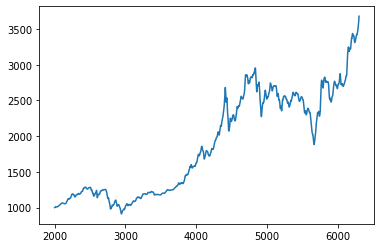

In [ ]:
plt.plot(df.iloc[2000:6300,4])

In [ ]:
import datetime as DT
from matplotlib import pyplot as plt
from matplotlib.dates import date2num


df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.columns[1:40]

Index(['open', 'Volume BTC', 'ema_n12_l1', 'sma_n12_l1', 'smaps_n12_l1',
       'ema_n24_l1', 'sma_n24_l1', 'smaps_n24_l1', 'ema_n30_l1', 'sma_n30_l1',
       'smaps_n30_l1', 'ema_n50_l1', 'sma_n50_l1', 'smaps_n50_l1',
       'ema_n100_l1', 'sma_n100_l1', 'smaps_n100_l1', 'ema_n200_l1',
       'sma_n200_l1', 'smaps_n200_l1', 'smas_n200_m50_l1', 'macdss_l1',
       'rsi_n14_l1', 'k_perc_n14_l1', 'k_perc_d_n14_l1', 'cci_n14_l1',
       'lwi_n14_l1', 'rsi_n24_l1', 'k_perc_n24_l1', 'k_perc_d_n24_l1',
       'cci_n24_l1', 'lwi_n24_l1', 'rsi_n36_l1', 'k_perc_n36_l1',
       'k_perc_d_n36_l1', 'cci_n36_l1', 'lwi_n36_l1', 'rsi_n48_l1',
       'k_perc_n48_l1'],
      dtype='object')

In [ ]:
zakres = range(10200,10400)
sciezka = '/content/drive/My Drive/Magisterka/wykresy/'

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
axes[0].plot( 'x_values', 'y_values', data=df, marker='o', alpha=0.4)
axes[1].plot( 'x_values','z_values', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
axes[0].title.set_text('These 2 plots have the same limit for the Y axis')

# Show the graph
plt.show()

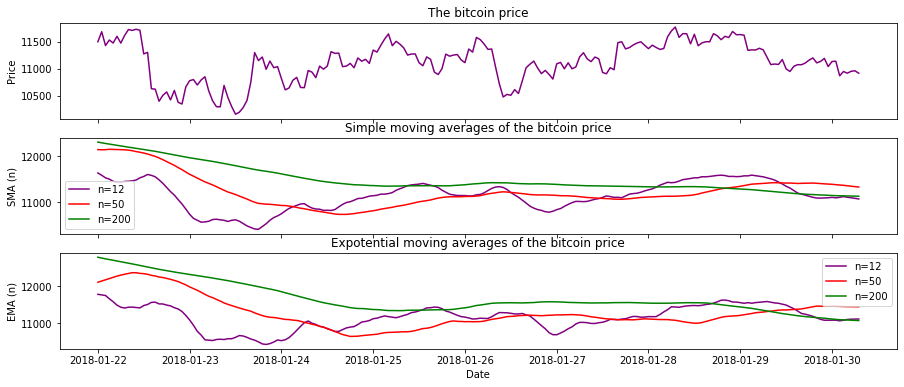

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 6), sharex=True)
kolory = {12: 'purple', 50:'red', 200:'green'}

ax[0].plot(list(df['date'].iloc[zakres]),
        list(df['open'].iloc[zakres]),
        color=kolory[12])


ax[0].set(
       ylabel="Price",
       title="The bitcoin price")

for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[1].plot(list(df['date'].iloc[zakres]),
        list(df['sma_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[1].legend()

# Set title and labels for axes
ax[1].set(
       ylabel="SMA (n)",
       title="Simple moving averages of the bitcoin price")

for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[2].plot(list(df['date'].iloc[zakres]),
        list(df['ema_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[2].legend()

# Set title and labels for axes
ax[2].set(xlabel="Date",
       ylabel="EMA (n)",
       title="Expotential moving averages of the bitcoin price")


plt.savefig(sciezka+'feature_technical_1.png', dpi=300, bbox_inches='tight')
plt.show()

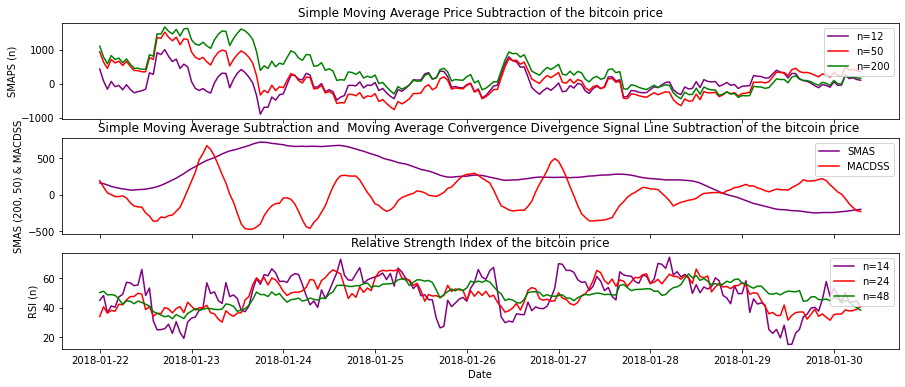

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 6), sharex=True)
kolory = {12: 'purple', 50:'red', 200:'green'}
for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[0].plot(list(df['date'].iloc[zakres]),
        list(df['smaps_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[0].legend()

# Set title and labels for axes
ax[0].set(
       ylabel="SMAPS (n)",
       title="Simple Moving Average Price Subtraction of the bitcoin price")

kolory = {12: 'purple'}

# Add x-axis and y-axis
ax[1].plot(list(df['date'].iloc[zakres]),
      list(df['smas_n200_m50_l1'].iloc[zakres]),
      color=kolory[12], label = 'SMAS')

kolory = {12: 'red'}

# Add x-axis and y-axis
ax[1].plot(list(df['date'].iloc[zakres]),
      list(df['macdss_l1'].iloc[zakres]),
      color=kolory[12], label = 'MACDSS')

ax[1].legend()

# Set title and labels for axes
ax[1].set(
       ylabel="SMAS (200, 50) & MACDSS",
       title="Simple Moving Average Subtraction and  Moving Average Convergence Divergence Signal Line Subtraction of the bitcoin price ")
kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[2].plot(list(df['date'].iloc[zakres]),
        list(df['rsi_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[2].legend()

# Set title and labels for axes
ax[2].set(xlabel="Date",
       ylabel="RSI (n)",
       title="Relative Strength Index of the bitcoin price")


plt.savefig(sciezka+'feature_technical_2.png', dpi=300, bbox_inches='tight')

plt.show()

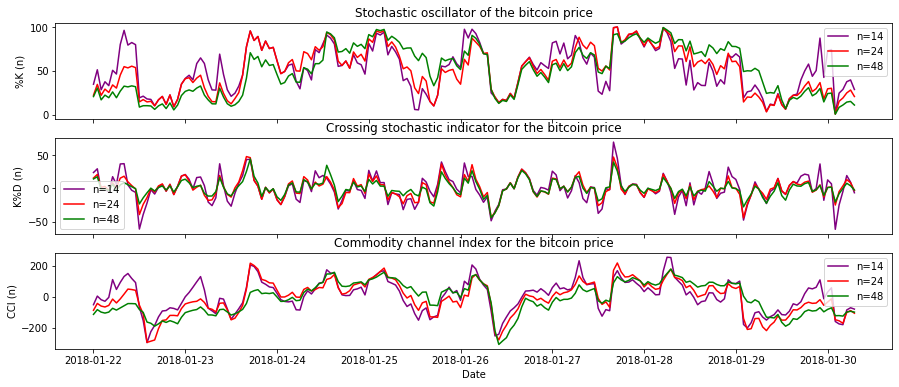

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 6), sharex=True)
kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[0].plot(list(df['date'].iloc[zakres]),
        list(df['k_perc_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[0].legend()

# Set title and labels for axes
ax[0].set(
       ylabel="%K (n)",
       title="Stochastic oscillator of the bitcoin price")

kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[1].plot(list(df['date'].iloc[zakres]),
        list(df['k_perc_d_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[1].legend()

# Set title and labels for axes
ax[1].set(
       ylabel="K%D (n)",
       title="Crossing stochastic indicator for the bitcoin price")

kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[2].plot(list(df['date'].iloc[zakres]),
        list(df['cci_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[2].legend()

# Set title and labels for axes
ax[2].set(xlabel="Date",
       ylabel="CCI (n)",
       title="Commodity channel index for the bitcoin price")

plt.savefig(sciezka+'feature_technical_3.png', dpi=300, bbox_inches='tight')
plt.show()

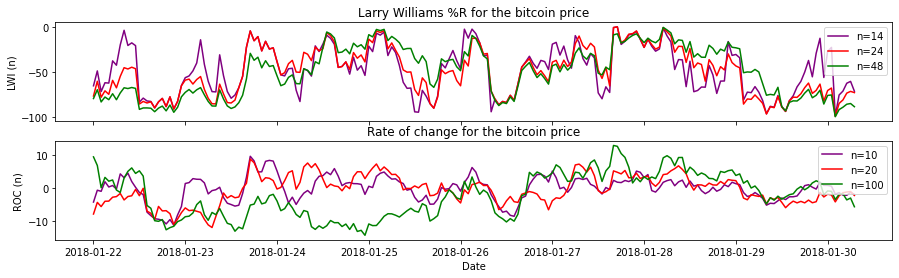

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 4), sharex=True)
kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[0].plot(list(df['date'].iloc[zakres]),
        list(df['lwi_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[0].legend()

# Set title and labels for axes
ax[0].set(
       ylabel="LWI (n)",
       title="Larry Williams %R for the bitcoin price")

kolory = {10: 'purple', 20:'red', 100:'green'}
for n in [10, 20, 100]:
# Add x-axis and y-axis
  ax[1].plot(list(df['date'].iloc[zakres]),
        list(df['roc_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[1].legend()

# Set title and labels for axes
ax[1].set(xlabel="Date",
       ylabel="ROC (n)",
       title="Rate of change for the bitcoin price")

plt.savefig(sciezka+'feature_technical_4.png', dpi=300, bbox_inches='tight')

plt.show()

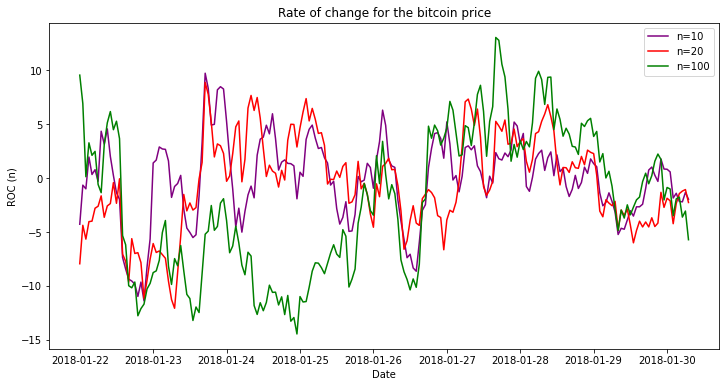

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
kolory = {10: 'purple', 20:'red', 100:'green'}
for n in [10, 20, 100]:
# Add x-axis and y-axis
  ax.plot(list(df['date'].iloc[zakres]),
        list(df['roc_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax.legend()

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ROC (n)",
       title="Rate of change for the bitcoin price")

plt.show()

In [ ]:
'k_perc_n14_l1', 'k_perc_d_n14_l1'

('k_perc_n14_l1', 'k_perc_d_n14_l1')

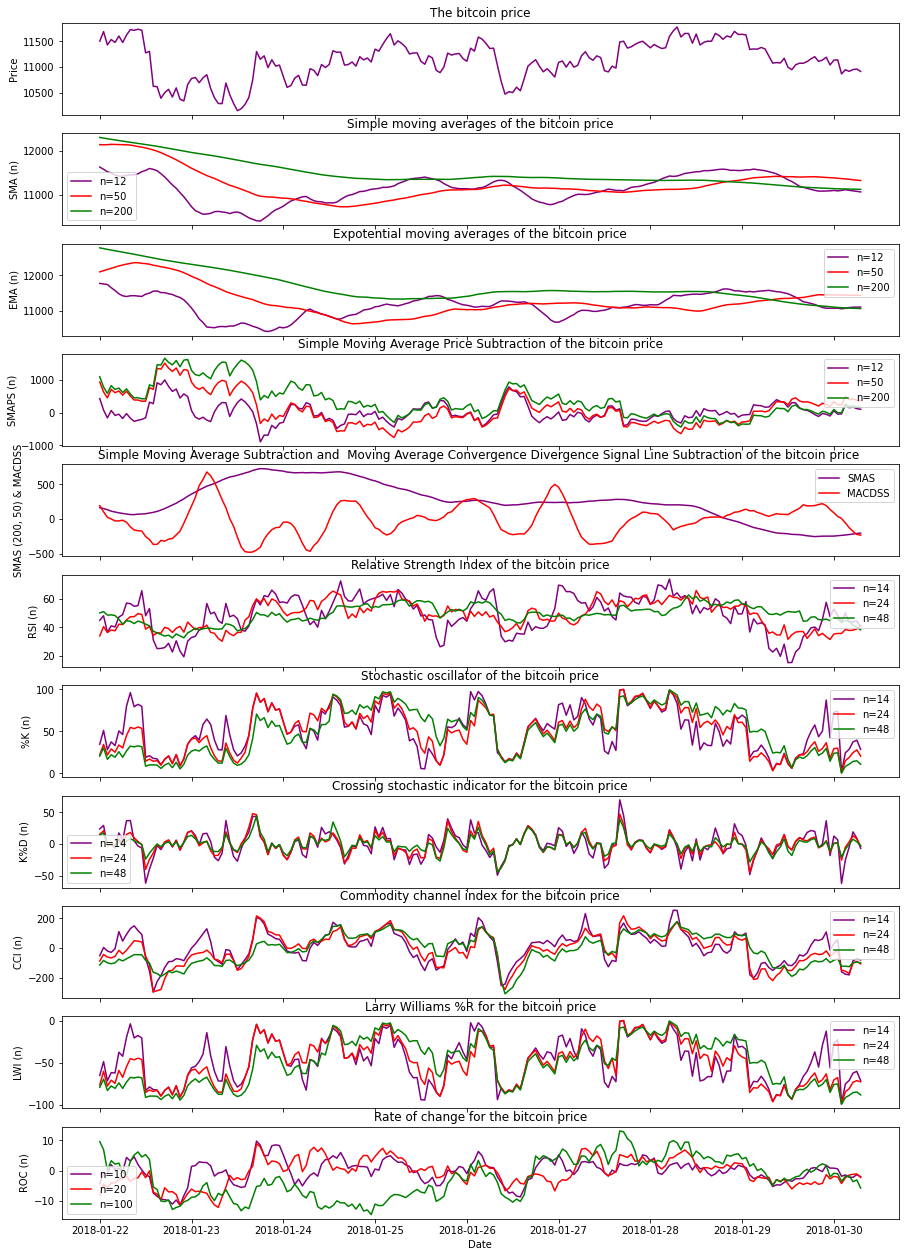

In [ ]:
fig, ax = plt.subplots(nrows=11, ncols=1,figsize=(15, 22), sharex=True)
kolory = {12: 'purple', 50:'red', 200:'green'}

ax[0].plot(list(df['date'].iloc[zakres]),
        list(df['open'].iloc[zakres]),
        color=kolory[12])


ax[0].set(
       ylabel="Price",
       title="The bitcoin price")

for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[1].plot(list(df['date'].iloc[zakres]),
        list(df['sma_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[1].legend()

# Set title and labels for axes
ax[1].set(
       ylabel="SMA (n)",
       title="Simple moving averages of the bitcoin price")

for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[2].plot(list(df['date'].iloc[zakres]),
        list(df['ema_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[2].legend()

# Set title and labels for axes
ax[2].set(
       ylabel="EMA (n)",
       title="Expotential moving averages of the bitcoin price")

kolory = {12: 'purple', 50:'red', 200:'green'}
for n in [12, 50, 200]:
# Add x-axis and y-axis
  ax[3].plot(list(df['date'].iloc[zakres]),
        list(df['smaps_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[3].legend()

# Set title and labels for axes
ax[3].set(
       ylabel="SMAPS (n)",
       title="Simple Moving Average Price Subtraction of the bitcoin price")

kolory = {12: 'purple'}

# Add x-axis and y-axis
ax[4].plot(list(df['date'].iloc[zakres]),
      list(df['smas_n200_m50_l1'].iloc[zakres]),
      color=kolory[12], label = 'SMAS')

kolory = {12: 'red'}

# Add x-axis and y-axis
ax[4].plot(list(df['date'].iloc[zakres]),
      list(df['macdss_l1'].iloc[zakres]),
      color=kolory[12], label = 'MACDSS')

ax[4].legend()

# Set title and labels for axes
ax[4].set(
       ylabel="SMAS (200, 50) & MACDSS",
       title="Simple Moving Average Subtraction and  Moving Average Convergence Divergence Signal Line Subtraction of the bitcoin price ")
kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[5].plot(list(df['date'].iloc[zakres]),
        list(df['rsi_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[5].legend()

# Set title and labels for axes
ax[5].set(
       ylabel="RSI (n)",
       title="Relative Strength Index of the bitcoin price")

kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[6].plot(list(df['date'].iloc[zakres]),
        list(df['k_perc_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[6].legend()

# Set title and labels for axes
ax[6].set(
       ylabel="%K (n)",
       title="Stochastic oscillator of the bitcoin price")

kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[7].plot(list(df['date'].iloc[zakres]),
        list(df['k_perc_d_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[7].legend()

# Set title and labels for axes
ax[7].set(
       ylabel="K%D (n)",
       title="Crossing stochastic indicator for the bitcoin price")

kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[8].plot(list(df['date'].iloc[zakres]),
        list(df['cci_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[8].legend()

# Set title and labels for axes
ax[8].set(
       ylabel="CCI (n)",
       title="Commodity channel index for the bitcoin price")


kolory = {14: 'purple', 24:'red', 48:'green'}
for n in [14, 24, 48]:
# Add x-axis and y-axis
  ax[9].plot(list(df['date'].iloc[zakres]),
        list(df['lwi_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[9].legend()

# Set title and labels for axes
ax[9].set(
       ylabel="LWI (n)",
       title="Larry Williams %R for the bitcoin price")

kolory = {10: 'purple', 20:'red', 100:'green'}
for n in [10, 20, 100]:
# Add x-axis and y-axis
  ax[10].plot(list(df['date'].iloc[zakres]),
        list(df['roc_n'+str(n)+'_l1'].iloc[zakres]),
        color=kolory[n], label='n='+str(n))


ax[10].legend()

# Set title and labels for axes
ax[10].set(xlabel="Date",
       ylabel="ROC (n)",
       title="Rate of change for the bitcoin price")


plt.savefig(sciezka+'feature_technical.png', dpi=300, bbox_inches='tight')
plt.show()

MODEL

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
dataset = df.drop(columns = 'date')
values = dataset.values

In [ ]:
values

array([[ 4.57523000e+03,  4.44731242e+03,  4.46514833e+03, ...,
         4.35908165e-01,  1.04386162e+00,  5.51033937e-01],
       [ 4.57000000e+03,  4.46405110e+03,  4.44956083e+03, ...,
         1.63318777e-01,  6.43780409e+00,  6.95944733e+00],
       [ 4.59755000e+03,  4.44787526e+03,  4.46722917e+03, ...,
         8.03285451e-01, -1.04731282e-01,  8.13799593e-01],
       ...,
       [ 4.02421000e+03,  4.02434746e+03,  4.02393250e+03, ...,
        -3.67751761e-01,  2.44866362e+00,  9.97878723e-01],
       [ 4.03805000e+03,  4.02290737e+03,  4.02415500e+03, ...,
         1.36374075e+00,  2.23369840e+00,  7.95236112e-01],
       [ 4.01704000e+03,  4.02476571e+03,  4.02426000e+03, ...,
         1.92955986e-01,  2.26501113e+00,  1.07905808e+00]])

In [ ]:
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning


In [ ]:
scaled.shape

(13820, 181)

In [ ]:
tweets = pd.read_csv(data_dir + 'tweets_kaggle.csv', sep = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
tweets = tweets[['timestamp', 'text', 'replies', 'likes', 'retweets']]

In [ ]:
tweets.timestamp>

Index(['timestamp', 'text', 'replies', 'likes', 'retweets'], dtype='object')

In [ ]:
tweets = tweets.loc[(tweets['timestamp']>'2017-08-30') & (tweets['timestamp']<'2019-03-29')]

In [ ]:
tweets = tweets.sort_values('timestamp')

In [ ]:
tweets.to_csv(data_dir + 'tweets_prepared.csv', index = False)

In [ ]:
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
import sys
!{sys.executable} -m pip install transformers

     |████████████████████████████████| 2.0 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 649 kB/s eta 0:00:01
  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893259 sha256=bf1897202c1a2be2b8e3fe3e5c12b3d568f378d0c71104f515ffd3c3a55e7211
  Stored in directory: /Users/asia/Library/Caches/pip/wheels/7b/78/f4/27d43a65043e1b75dbddaa421b573eddc67e712be4b1c80677
Successfully built sacremoses


In [ ]:
from transformers import XLNetTokenizer, XLNetModel, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap